In [1]:
### 常规分析包
import os
import time
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import norm, pearsonr, spearmanr
from scipy.spatial import distance
### 绘图包
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42 # 输出PDF文字可编辑
### 其他
import cloudpickle as pickle
import warnings
warnings.filterwarnings("ignore") # 报错提示
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' #last_expr

In [2]:
sns.color_palette(["#4a4a4a", "#00798c", "#d1495b", '#edae49', '#66a182', '#ffe2b3', '#ccffe4'])

[(0.2901960784313726, 0.2901960784313726, 0.2901960784313726),
 (0.0, 0.4745098039215686, 0.5490196078431373),
 (0.8196078431372549, 0.28627450980392155, 0.3568627450980392),
 (0.9294117647058824, 0.6823529411764706, 0.28627450980392155),
 (0.4, 0.6313725490196078, 0.5098039215686274),
 (1.0, 0.8862745098039215, 0.7019607843137254),
 (0.8, 1.0, 0.8941176470588236)]

In [4]:
data = pd.read_csv('../20230718_Results/Table S3Add. Differential pathway.csv', index_col=0)
data.head(2)

,Project,Unmatched_p<0.05,Matched_p<0.05,Overlap_p<0.05,Unmatched_fdr<0.05,Matched_fdr<0.05,Overlap_fdr<0.05,Unmatched_cohen's d>0.2,Matched_cohen's d>0.2,Overlap_cohen's d>0.2,Unmatched_cohen's d>0.5,Matched_cohen's d>0.5,Overlap_cohen's d>0.5
0,08,211,396,198,123,392,115,397,395,369,283,315,237
1,09,125,117,40,30,74,16,428,375,341,314,168,98


# 1.

(100.79545454545455, 105.22727272727273)

0.4588911396663411

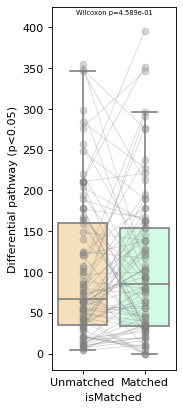

(52.42045454545455, 57.21590909090909)

2.057004197069429e-06

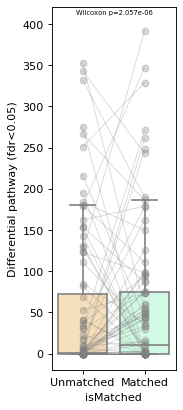

(267.70454545454544, 240.1931818181818)

0.0015279399782869058

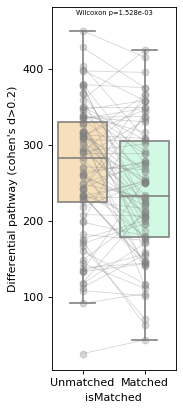

(92.875, 84.125)

0.4928494818065259

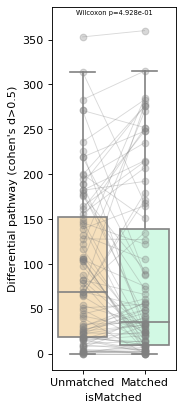

In [5]:
plotdata = []
for i in data.index:
    plotdata.append([data.loc[i, 'Project'], 'Unmatched', data.loc[i, 'Unmatched_p<0.05']])
    plotdata.append([data.loc[i, 'Project'], 'Matched', data.loc[i, 'Matched_p<0.05']])
plotdata = pd.DataFrame(plotdata, columns=['Project', 'isMatched', 'Differential pathway (p<0.05)'])

_ = plt.figure(0, (2, 6), dpi=80)
_ = sns.boxplot(data=plotdata, x="isMatched", y='Differential pathway (p<0.05)', order=["Unmatched", "Matched"], palette=['#ffe2b3', '#ccffe4'], 
                fliersize=0)
for i in data.index:
    _ = plt.plot([0, 1], [data.loc[i, 'Unmatched_p<0.05'], data.loc[i, 'Matched_p<0.05']], '-o', alpha=0.3, color='gray', lw=0.8)

data['Unmatched_p<0.05'].mean(), data['Matched_p<0.05'].mean()
p = stats.wilcoxon(data['Unmatched_p<0.05'], data['Matched_p<0.05'], alternative='two-sided')[1]
p
_ = plt.annotate('Wilcoxon p=%.3e'%p, (-0.1, plt.ylim()[1]), fontsize=6)
_ = plt.ylim([plt.ylim()[0], plt.ylim()[1]+0.02*(plt.ylim()[1]-plt.ylim()[0])])
_ = plt.savefig('../20230718_Results/Figure 3M. Differential pathways (p<0.05).pdf', dpi=300)
_ = plt.show()
####
plotdata = []
for i in data.index:
    plotdata.append([data.loc[i, 'Project'], 'Unmatched', data.loc[i, 'Unmatched_fdr<0.05']])
    plotdata.append([data.loc[i, 'Project'], 'Matched', data.loc[i, 'Matched_fdr<0.05']])
plotdata = pd.DataFrame(plotdata, columns=['Project', 'isMatched', 'Differential pathway (fdr<0.05)'])

_ = plt.figure(0, (2, 6), dpi=80)
_ = sns.boxplot(data=plotdata, x="isMatched", y='Differential pathway (fdr<0.05)', order=["Unmatched", "Matched"], palette=['#ffe2b3', '#ccffe4'], 
                fliersize=0)
for i in data.index:
    _ = plt.plot([0, 1], [data.loc[i, 'Unmatched_fdr<0.05'], data.loc[i, 'Matched_fdr<0.05']], '-o', alpha=0.3, color='gray', lw=0.8)

data['Unmatched_fdr<0.05'].mean(), data['Matched_fdr<0.05'].mean()
p = stats.wilcoxon(data['Unmatched_p<0.05'], data['Matched_fdr<0.05'], alternative='two-sided')[1]
p
_ = plt.annotate('Wilcoxon p=%.3e'%p, (-0.1, plt.ylim()[1]), fontsize=6)
_ = plt.ylim([plt.ylim()[0], plt.ylim()[1]+0.02*(plt.ylim()[1]-plt.ylim()[0])])
_ = plt.savefig('../20230718_Results/Figure 3M. Differential pathways (fdr<0.05).pdf', dpi=300)
_ = plt.show()
####
plotdata = []
for i in data.index:
    plotdata.append([data.loc[i, 'Project'], 'Unmatched', data.loc[i, "Unmatched_cohen's d>0.2"]])
    plotdata.append([data.loc[i, 'Project'], 'Matched', data.loc[i, "Matched_cohen's d>0.2"]])
plotdata = pd.DataFrame(plotdata, columns=['Project', 'isMatched', "Differential pathway (cohen's d>0.2)"])

_ = plt.figure(0, (2, 6), dpi=80)
_ = sns.boxplot(data=plotdata, x="isMatched", y="Differential pathway (cohen's d>0.2)", order=["Unmatched", "Matched"], palette=['#ffe2b3', '#ccffe4'], 
                fliersize=0)
for i in data.index:
    _ = plt.plot([0, 1], [data.loc[i, "Unmatched_cohen's d>0.2"], data.loc[i, "Matched_cohen's d>0.2"]], '-o', alpha=0.3, color='gray', lw=0.8)

data["Unmatched_cohen's d>0.2"].mean(), data["Matched_cohen's d>0.2"].mean()
p = stats.wilcoxon(data["Unmatched_cohen's d>0.2"], data["Matched_cohen's d>0.2"], alternative='two-sided')[1]
p
_ = plt.annotate('Wilcoxon p=%.3e'%p, (-0.1, plt.ylim()[1]), fontsize=6)
_ = plt.ylim([plt.ylim()[0], plt.ylim()[1]+0.02*(plt.ylim()[1]-plt.ylim()[0])])
_ = plt.savefig("../20230718_Results/Figure 3M. Differential pathways (cohen's d>0.2).pdf", dpi=300)
_ = plt.show()
####
plotdata = []
for i in data.index:
    plotdata.append([data.loc[i, 'Project'], 'Unmatched', data.loc[i, "Unmatched_cohen's d>0.5"]])
    plotdata.append([data.loc[i, 'Project'], 'Matched', data.loc[i, "Matched_cohen's d>0.5"]])
plotdata = pd.DataFrame(plotdata, columns=['Project', 'isMatched', "Differential pathway (cohen's d>0.5)"])

_ = plt.figure(0, (2, 6), dpi=80)
_ = sns.boxplot(data=plotdata, x="isMatched", y="Differential pathway (cohen's d>0.5)", order=["Unmatched", "Matched"], palette=['#ffe2b3', '#ccffe4'], 
                fliersize=0)
for i in data.index:
    _ = plt.plot([0, 1], [data.loc[i, "Unmatched_cohen's d>0.5"], data.loc[i, "Matched_cohen's d>0.5"]], '-o', alpha=0.3, color='gray', lw=0.8)

data["Unmatched_cohen's d>0.5"].mean(), data["Matched_cohen's d>0.5"].mean()
p = stats.wilcoxon(data["Unmatched_cohen's d>0.5"], data["Matched_cohen's d>0.5"], alternative='two-sided')[1]
p
_ = plt.annotate('Wilcoxon p=%.3e'%p, (-0.1, plt.ylim()[1]), fontsize=6)
_ = plt.ylim([plt.ylim()[0], plt.ylim()[1]+0.02*(plt.ylim()[1]-plt.ylim()[0])])
_ = plt.savefig("../20230718_Results/Figure 3M. Differential pathways (cohen's d>0.5).pdf", dpi=300)
_ = plt.show()

# 2. 

In [14]:
projects_message=pd.read_csv('../Label/fenzu.csv',index_col=0).T
projects_message=projects_message.to_dict('list')

,Project,type,study,overlap,Unmatched,Matched
0,08,Others,BrooksB_2017,198,211,396
1,09,schizofrenia,Castro-NallarE_2015,40,125,117


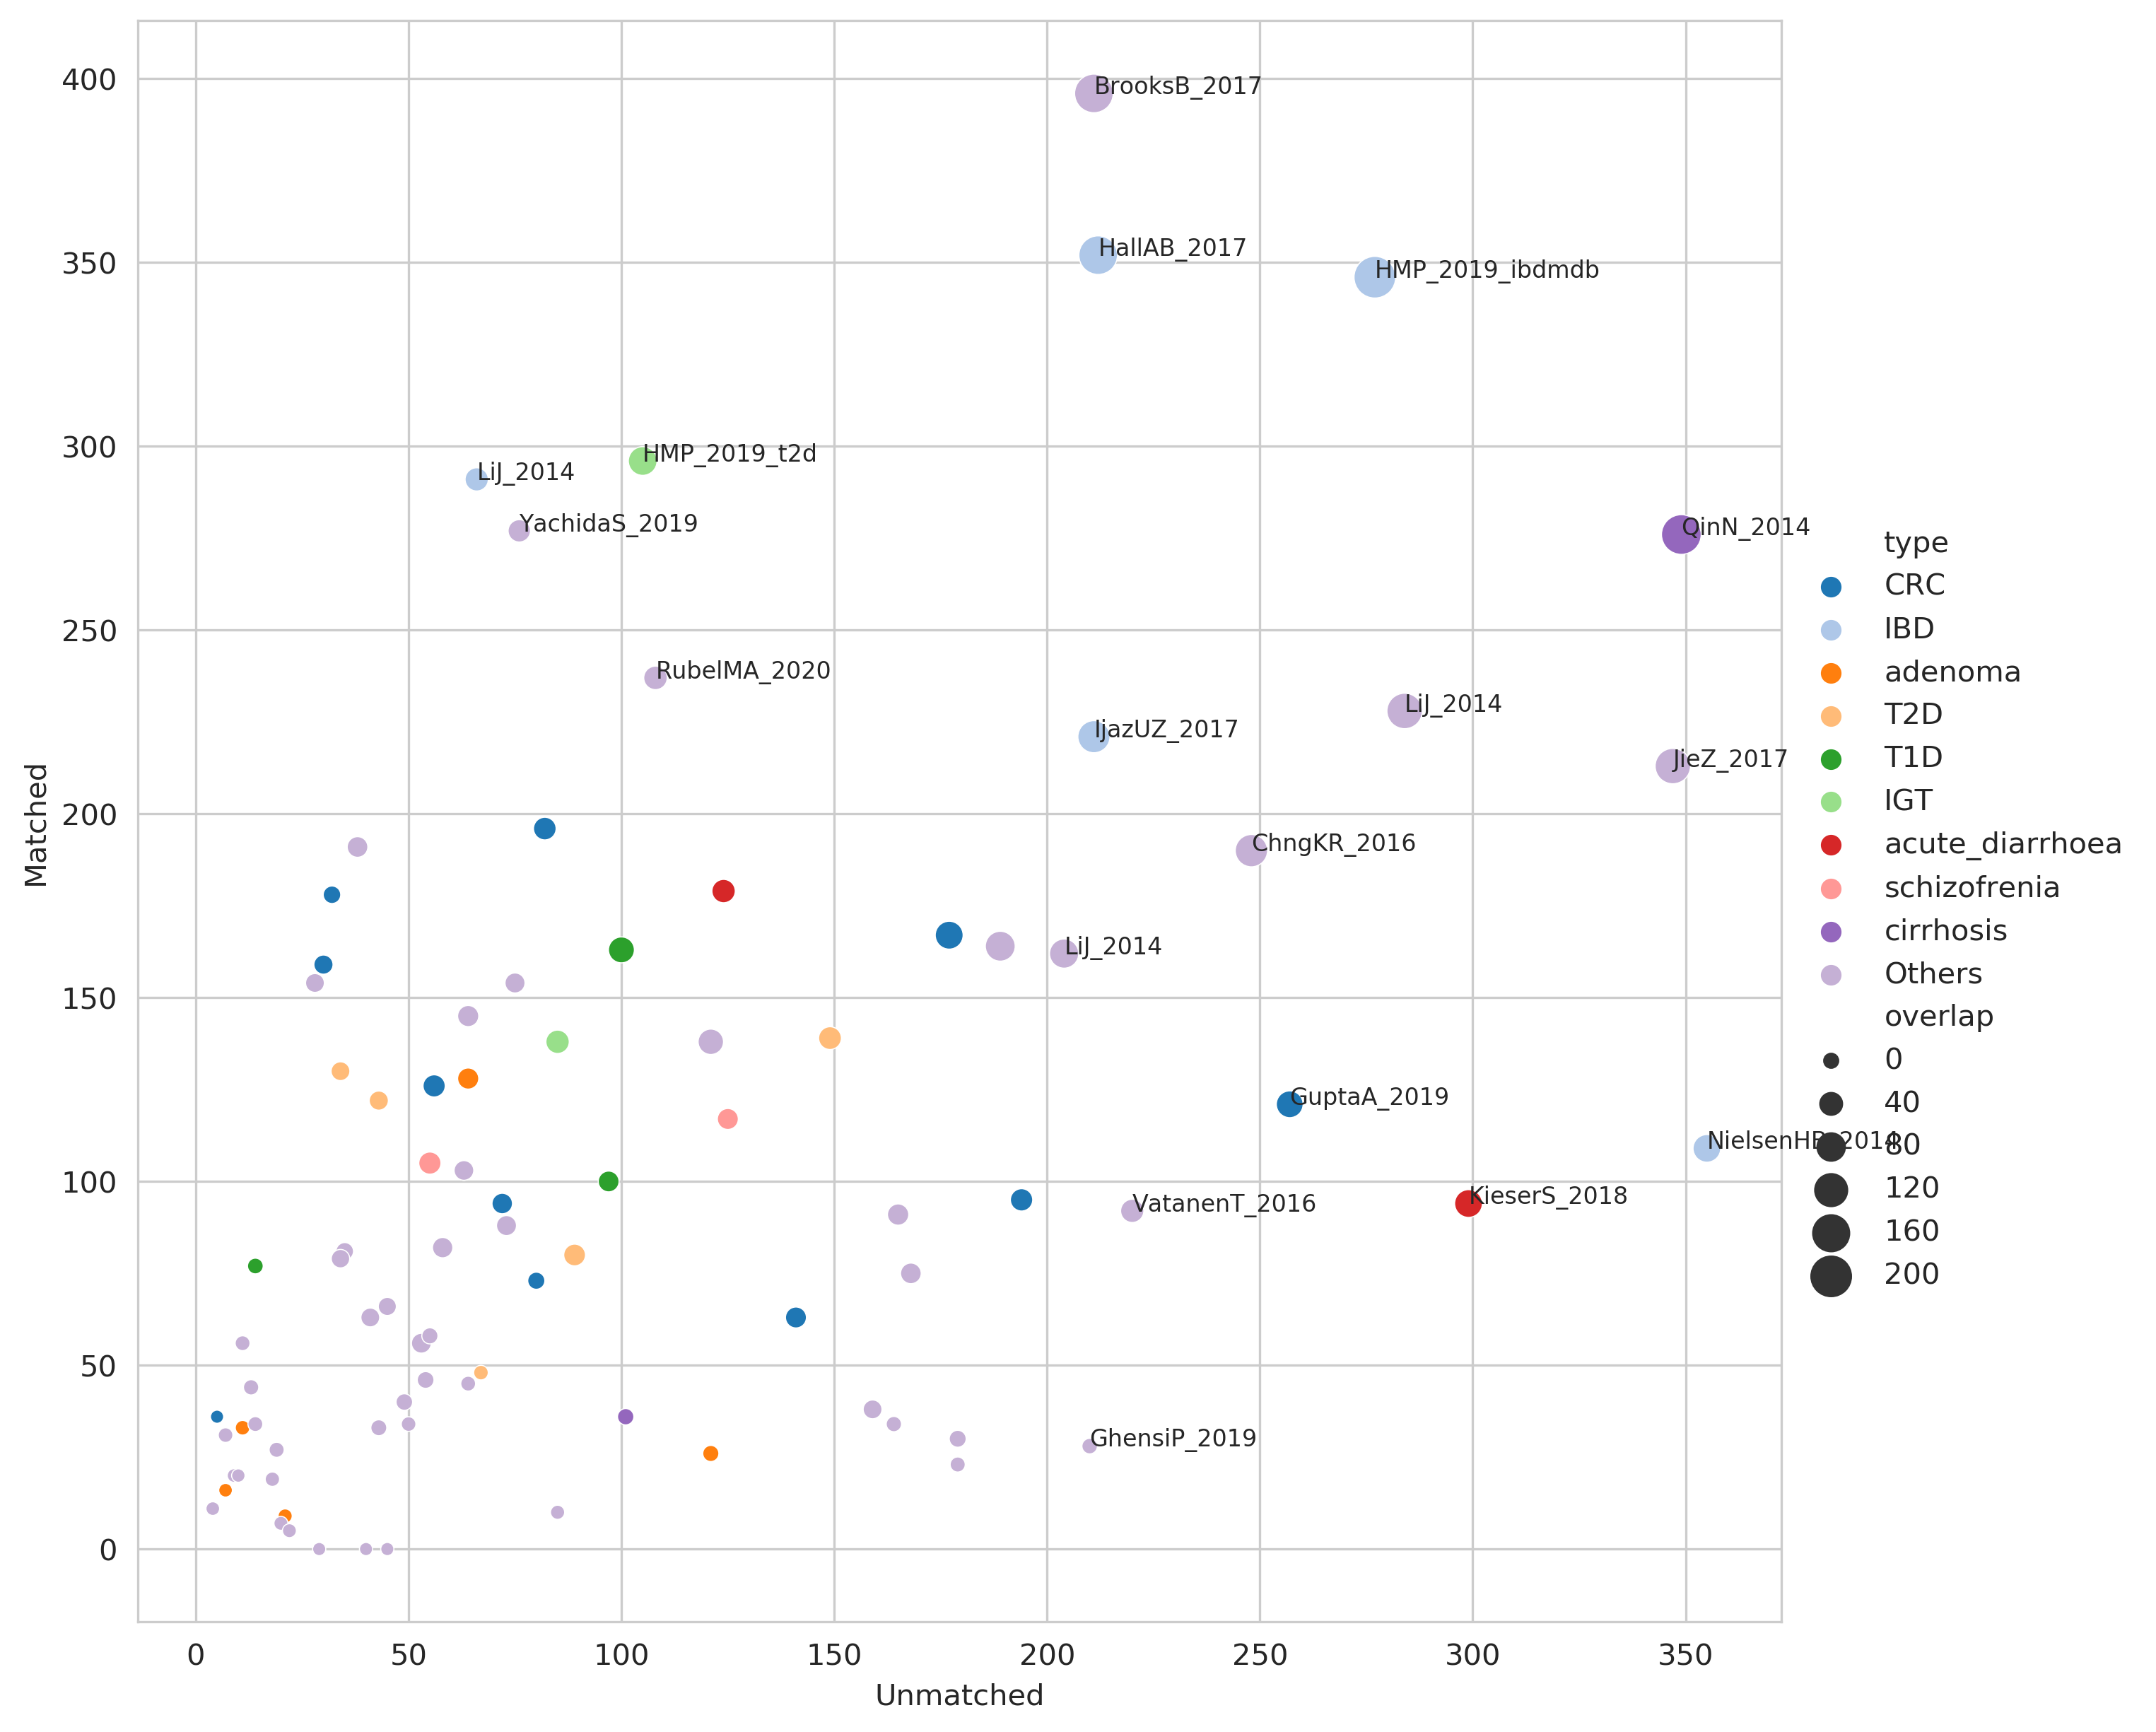

In [41]:
plotdata = pd.DataFrame()
plotdata['Project'] = data['Project']
disease = []
studys = []
selected = ['CRC', 'IBD', 'adenoma', 'T2D', 'T1D', 'IGT', 'acute_diarrhoea', 'schizofrenia', 'cirrhosis']
for i in data['Project']:
    study, site, trial0, trial1 = projects_message[i]
    studys.append(study)
    if trial0=='control' and trial1 in selected:
        disease.append(trial1)
    else:
        disease.append('Others')
#sorted([(i, disease.count(i)) for i in set(disease)], key=lambda x:x[1], reverse=True)

selected.append('Others')
plotdata['type'] = disease
plotdata['study'] = studys
plotdata['overlap'] = data['Overlap_p<0.05']
plotdata['Unmatched'] = data['Unmatched_p<0.05']
plotdata['Matched'] = data['Matched_p<0.05']
plotdata.head(2)

fig = plt.figure(0, (10, 10), dpi=300)
_ = sns.set_style("whitegrid")
#palette = list(sns.color_palette('tab20'))
#palette.extend([(230/255., 180/255., 34/255.), (253/255., 222/255., 165/255.),])
_ = sns.scatterplot(data=plotdata, x="Unmatched", y="Matched", size="overlap", sizes=(20, 200), 
                    hue='type', hue_order=selected, palette='tab20')
for i in plotdata.index:
    if plotdata.loc[i, 'Unmatched']>200 or plotdata.loc[i, 'Matched']>220:
        _ = plt.annotate(plotdata.loc[i, 'study'], (plotdata.loc[i, 'Unmatched'], plotdata.loc[i, 'Matched']), fontsize=8)
#_ = plt.xlim(-0.02, 0.38)
#_ = plt.ylim(-0.02, 0.175)
_ = plt.legend(loc=(1.005, 0.2), frameon=False)
_ = plt.savefig("../20230718_Results/Figure 3M. Differential pathway_ratio (p<0.05).pdf", dpi=300)
_ = plt.show()

,Project,type,study,overlap,Unmatched,Matched
0,08,Others,BrooksB_2017,369,397,395
1,09,schizofrenia,Castro-NallarE_2015,341,428,375


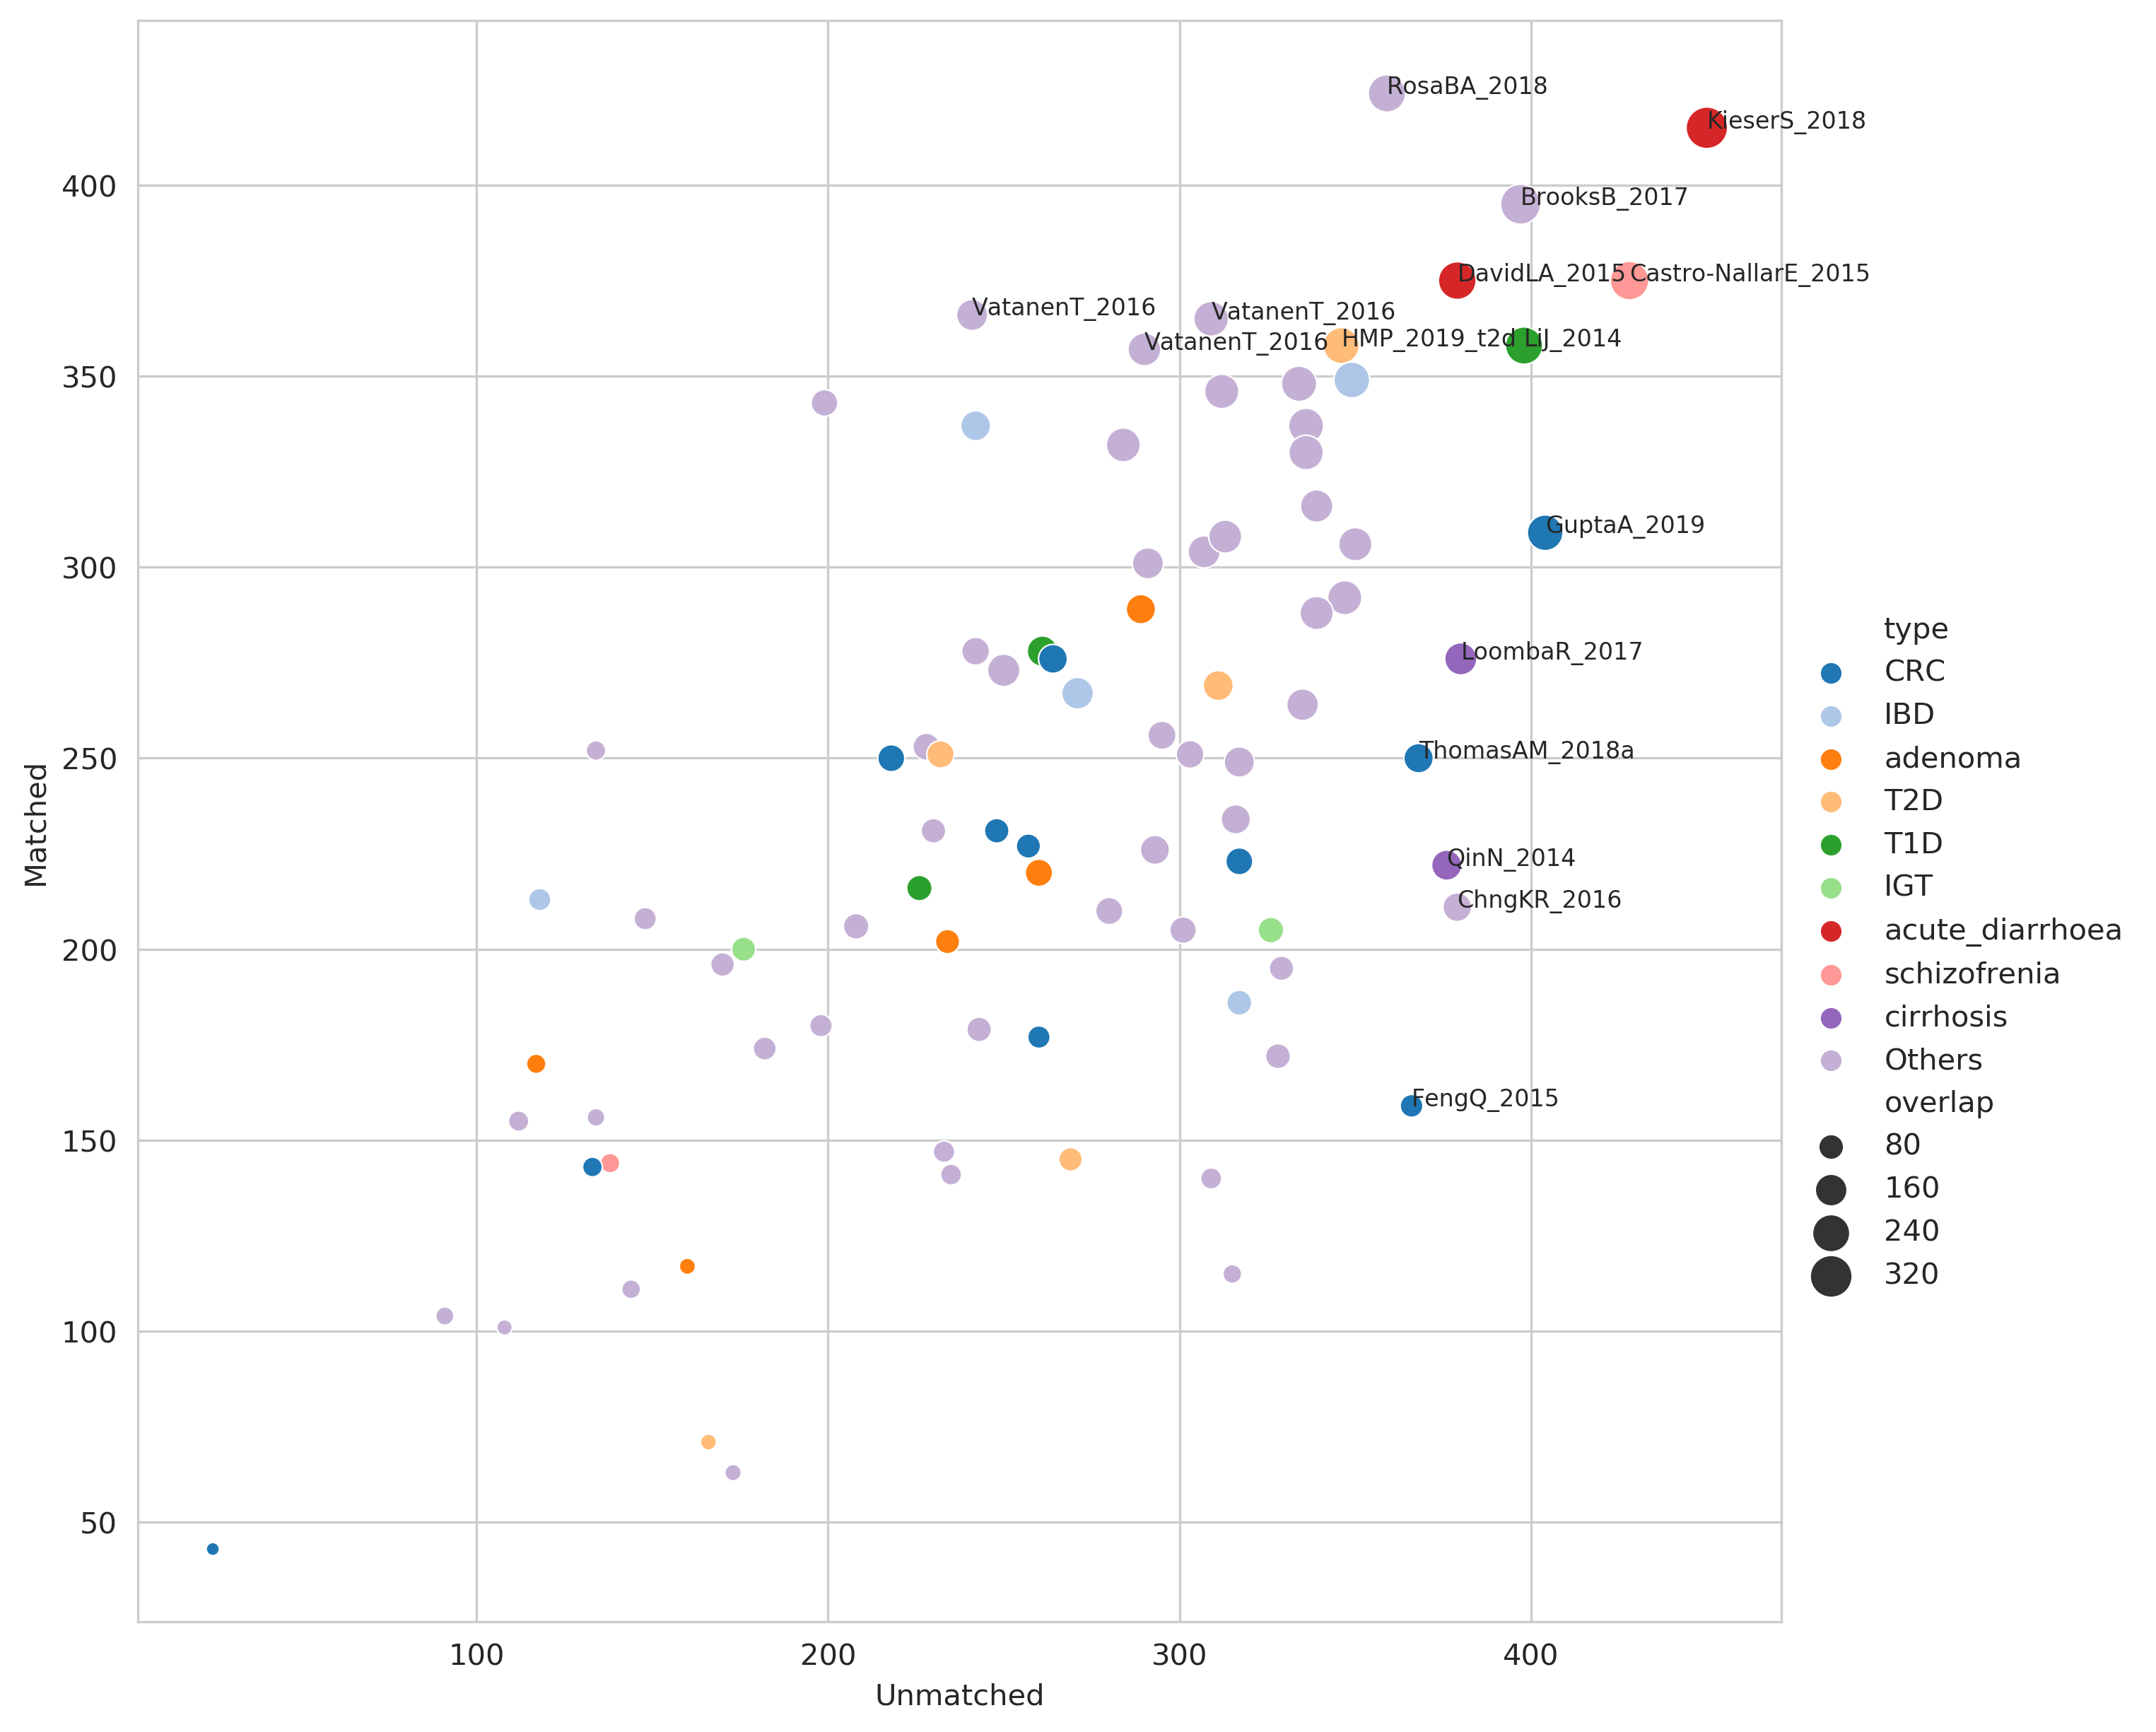

In [40]:
plotdata = pd.DataFrame()
plotdata['Project'] = data['Project']
disease = []
studys = []
selected = ['CRC', 'IBD', 'adenoma', 'T2D', 'T1D', 'IGT', 'acute_diarrhoea', 'schizofrenia', 'cirrhosis']
for i in data['Project']:
    study, site, trial0, trial1 = projects_message[i]
    studys.append(study)
    if trial0=='control' and trial1 in selected:
        disease.append(trial1)
    else:
        disease.append('Others')
#sorted([(i, disease.count(i)) for i in set(disease)], key=lambda x:x[1], reverse=True)

selected.append('Others')
plotdata['type'] = disease
plotdata['study'] = studys
plotdata['overlap'] = data["Overlap_cohen's d>0.2"]
plotdata['Unmatched'] = data["Unmatched_cohen's d>0.2"]
plotdata['Matched'] = data["Matched_cohen's d>0.2"]
plotdata.head(2)

fig = plt.figure(0, (10, 10), dpi=300)
_ = sns.set_style("whitegrid")
#palette = list(sns.color_palette('tab20'))
#palette.extend([(230/255., 180/255., 34/255.), (253/255., 222/255., 165/255.),])
_ = sns.scatterplot(data=plotdata, x="Unmatched", y="Matched", size="overlap", sizes=(20, 200), 
                    hue='type', hue_order=selected, palette='tab20')
#_ = sns.regplot(data=plotdata, x="Unmatched", y="Matched", scatter=False, color='#00798c')

for i in plotdata.index:
    if plotdata.loc[i, 'Unmatched']>350 or plotdata.loc[i, 'Matched']>350:
        _ = plt.annotate(plotdata.loc[i, 'study'], (plotdata.loc[i, 'Unmatched'], plotdata.loc[i, 'Matched']), fontsize=8)
#_ = plt.xlim(0, 500)
#_ = plt.ylim(0, 500)
_ = plt.legend(loc=(1.005, 0.2), frameon=False)
_ = plt.savefig("../20230718_Results/Figure 3M. Differential pathway_ratio (cohen's d>0.2).pdf", dpi=300)
_ = plt.show()